In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('aug_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
# Summarize the features with missing values.
df.isnull().sum()[df.isnull().sum() != 0].index

Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')

## 0. `enrollee_id`
`enrollee_id` is used to identify those enrolled in the program. Since it is unique for each record and has no bearing on the target, it can be dropped.

In [6]:
df.enrollee_id.nunique()

19158

In [7]:
df.drop(columns='enrollee_id', inplace=True)

## 1. `city`
`city` with low counts can be binned together to reduce the total number of categories.

In [8]:
df.city.value_counts(dropna=False).head(40)

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
city_73      280
city_100     275
city_71      266
city_11      247
city_90      197
city_61      197
city_28      192
city_23      182
city_65      175
city_36      160
city_173     151
city_83      143
city_50      140
city_116     128
city_46      128
city_162     128
city_138     120
city_19      119
city_64      114
city_45      113
city_97      104
city_74      104
city_57      103
city_149     102
city_159      94
city_99       94
city_128      92
city_41       89
city_10       86
city_165      82
Name: city, dtype: int64

In [9]:
df.city.value_counts(dropna=False).tail(20)

city_146    8
city_180    7
city_81     7
city_2      7
city_120    6
city_107    6
city_179    5
city_139    5
city_62     5
city_31     4
city_82     4
city_25     4
city_18     4
city_166    4
city_8      4
city_129    3
city_111    3
city_121    3
city_140    1
city_171    1
Name: city, dtype: int64

In [10]:
city_counts = df['city'].value_counts()
cities_to_replace = city_counts[city_counts<300].index
cities_to_replace

for city in cities_to_replace:
    df['city'] = df['city'].replace(city, 'Other')

df['city'].value_counts()

Other       6460
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: city, dtype: int64

## 2. `city_development_index`
- city development index, already scaled
- confirmed: each city does have a single `city_development_index`, but different cities might share the same value.

In [11]:
df['city_development_index'].nunique()

93

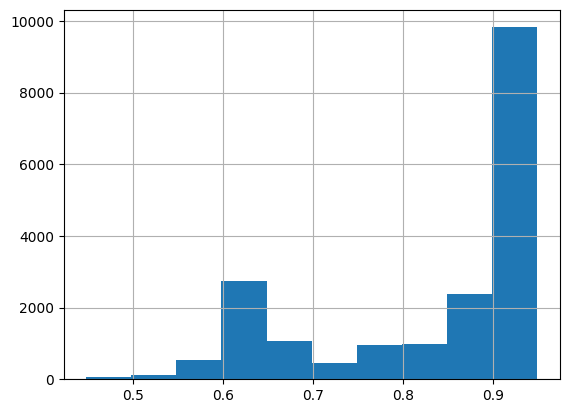

In [12]:
df['city_development_index'].hist(bins=10);

In [13]:
all(df.groupby('city')['city_development_index'].nunique() == 1)

False

## 3. `gender`
Missing values need to be dealt with. It's not immediately clear how to go about it: do we impute with the most frequent value to simply group it with `Other`? Since there are 10 males to 1 female in this training problem, we can approach this problem with filling in the missing values with `Male`.

In [14]:
df['gender'].value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [15]:
df['gender'].fillna('Male', inplace=True)
df['gender'].value_counts(dropna=False)

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

## 4. `relevent_experience`
This is one of the few categorical features without missing values.

In [16]:
df['relevent_experience'].value_counts(dropna=False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [17]:
df['relevent_experience'].replace('Has relevent experience', 'y', inplace=True)
df['relevent_experience'].replace('No relevent experience', 'n', inplace=True)
df['relevent_experience'].value_counts(dropna=False)

y    13792
n     5366
Name: relevent_experience, dtype: int64

## 5. `enrolled_university`
Missing values need to be dealt with: impute with the most frequent value

In [18]:
df['enrolled_university'].value_counts(dropna=False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [19]:
df['enrolled_university'].fillna('no_enrollment', inplace=True)
df['enrolled_university'].replace('no_enrollment', 'none', inplace=True)
df['enrolled_university'].replace('Full time course', 'full_time', inplace=True)
df['enrolled_university'].replace('Part time course', 'part_time', inplace=True)
df['enrolled_university'].value_counts(dropna=False)

none         14203
full_time     3757
part_time     1198
Name: enrolled_university, dtype: int64

## 6. `education_level`
Missing values need to be dealt with: impute with the most frequent value

In [20]:
df['education_level'].value_counts(dropna=False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [21]:
df['education_level'].fillna('Graduate', inplace=True)

In [22]:
df['education_level'].value_counts(dropna=False)

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

## 7. `major_discipline`
Missing values need to be dealt with.

In [23]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [24]:
df['major_discipline'].fillna('STEM', inplace=True)
df['major_discipline'].value_counts(dropna=False)

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

## 8. `experience`
- Candidate total experience in years
- Missing values need to be dealt with.

In [25]:
df['experience'].value_counts(dropna=False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

In [26]:
len(df['experience'].value_counts(dropna=False))

23

In [27]:
df['experience'].fillna('>20', inplace=True)
df['experience'].value_counts(dropna=False)

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [28]:
for exp in ['<1', '1', '2']:
    df['experience'].replace(exp, '<3', inplace=True)

for exp in ['3', '4']:
    df['experience'].replace(exp, '<5', inplace=True)
    
for exp in ['5', '6', '7', '8', '9']:
    df['experience'].replace(exp, '<10', inplace=True)

for exp in ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']:
    df['experience'].replace(exp, '>=10', inplace=True)

df['experience'].value_counts(dropna=False)

>=10    8747
<10     5456
<5      2757
<3      2198
Name: experience, dtype: int64

## 9. `company_size`
- Number of employees in current employer's company
- Missing values need to be dealt with.

In [29]:
df['company_size'].value_counts(dropna=False)

NaN          5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [30]:
df['company_size'].replace('10/49', '10-49', inplace=True)
df['company_size'].fillna('50-99', inplace=True)
df['company_size'].value_counts(dropna=False)

50-99        9021
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

## 10. `company_type`
Missing values need to be dealt with.

In [31]:
df['company_type'].value_counts(dropna=False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [32]:
df['company_type'].fillna('Pvt Ltd', inplace=True)
df['company_type'].value_counts(dropna=False)

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

## 11. `last_new_job`
- difference in years between previous and current job
- Missing values need to be dealt with.

In [33]:
df['last_new_job'].value_counts(dropna=False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

In [34]:
df['last_new_job'].fillna('1', inplace=True)
df['last_new_job'].value_counts(dropna=False)

1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

## 12. `training_hours`
Need to be scaled

<Axes: >

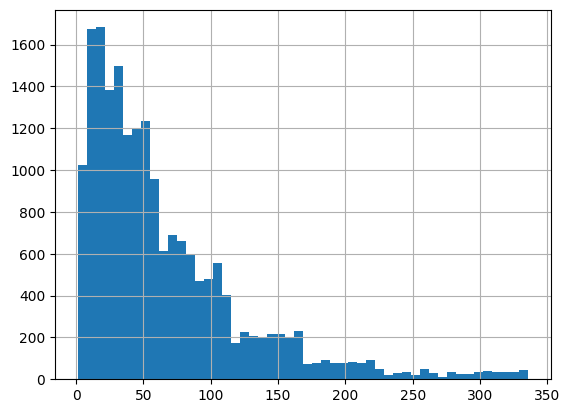

In [35]:
df['training_hours'].hist(bins=50)

## 13. `target`
`target` is imbalanced, so it needs to be addressed by ensuring `stratify=y` or resampling.

In [36]:
df['target'].value_counts(dropna=False)

0.0    14381
1.0     4777
Name: target, dtype: int64

In [37]:
df['target'] = df['target'].astype('int')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  object 
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [39]:
df = pd.get_dummies(df)
df.head()

,city_development_index,training_hours,target,city_Other,city_city_102,city_city_103,city_city_104,city_city_114,city_city_136,city_city_16,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.776,47,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.624,83,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,52,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.767,8,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y = df.target
X = df.drop(columns='target')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Due to imbalanced target values, instantiate the random oversampler model.
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

In [42]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X.columns)
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# Add first hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Add second hidden layer.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Add output layer.
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model structure.
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model.
nn.compile(loss='binary_crossentropy', 
           optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
           metrics=['accuracy'])

In [44]:
# Train the model with the checkpoint callback.
iters = 50
fit_model = nn.fit(X_res, y_res, epochs=iters)

Epoch 1/50
675/675 [==============================] - 5s 4ms/step - loss: 0.6308 - accuracy: 0.6531
Epoch 2/50
675/675 [==============================] - 4s 6ms/step - loss: 0.5686 - accuracy: 0.7267
Epoch 3/50
675/675 [==============================] - 3s 5ms/step - loss: 0.5548 - accuracy: 0.7376
Epoch 4/50
675/675 [==============================] - 3s 4ms/step - loss: 0.5466 - accuracy: 0.7410
Epoch 5/50
675/675 [==============================] - 2s 4ms/step - loss: 0.5399 - accuracy: 0.7470
Epoch 6/50
675/675 [==============================] - 4s 5ms/step - loss: 0.5343 - accuracy: 0.7490
Epoch 7/50
675/675 [==============================] - 1s 2ms/step - loss: 0.5294 - accuracy: 0.7517
Epoch 8/50
675/675 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.7526
Epoch 9/50
675/675 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.7561
Epoch 10/50
675/675 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7577

In [45]:
# Evaluate the model using the test data.
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

150/150 - 0s - loss: 0.5927 - accuracy: 0.7213 - 338ms/epoch - 2ms/step
Loss: 0.5927190184593201, Accuracy: 0.7212943434715271


In [46]:
import numpy as np
predictions = nn.predict(X_test_scaled, verbose=0)
classes = np.where(predictions > 0.5, 1, 0)

In [51]:
print(classification_report(y_test, classes.flatten()))


              precision    recall  f1-score   support

           0       0.89      0.71      0.79      3596
           1       0.46      0.74      0.57      1194

    accuracy                           0.72      4790
   macro avg       0.68      0.73      0.68      4790
weighted avg       0.79      0.72      0.74      4790

